# Project 07: Logistic Regression & Probabilistic Predictions
## 4. Generating Probabilistic Predictions

In [1]:
# Set up the path for installing packages
.libPaths('C:/Users/james/anaconda3/envs/r-tutorial/Lib/R/library')

In [2]:
# install.packages("devtools")

In [2]:
# Load packages
library(data.table)
library(magrittr)
library(dplyr)
library(tidyr) 
library(skimr)
library(ggplot2)
library(yardstick)
library(pscl)
library(MASS)
library(caret)
library(workflows)
library(plotly)
library(IRdisplay)

# Suppress warning messages
options(warn = -1)

In [4]:
# Set up the working directory
setwd('C:/Users/james/Desktop/Coding/Kaggle/Health Insurance')

# Inspect the workspace
dir()

# Import trainng & testing dataset train.csv with fread()
train_df <- fread("train.csv")
test_df <- fread("test.csv")

# Call head() on train_df and test_df
head(train_df)
head(test_df)

[1] "1.png"                 "data descriptions.txt" "submission.csv"       
[4] "test.csv"              "train.csv"

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0


id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
381114,Male,27,1,28,1,< 1 Year,No,59097,152,297
381115,Male,22,1,30,1,< 1 Year,No,40207,152,266


In [5]:
# Fit the model
mdl_step <- glm(Response ~ Gender + Age + Driving_License + Region_Code + Previously_Insured + 
                    Vehicle_Age + Vehicle_Damage + Policy_Sales_Channel + Annual_Premium + Vintage,
                    data = train_df,
                    family = "binomial") %>%
                    stepAIC(trace = FALSE)

In [6]:
# Compute the probabilities of whether cuomsters would be interested in vehicle insurance
prob_purchase <- round(mdl_step %>% predict(test_df, type = "response"))
prob_purchase_d3 <- round(predict(mdl_step, test_df, type = "response"), digits = 3)

# Convert it to a dataframe
df_prob_purchase <- data.frame(Response_Pred = prob_purchase)
df_prob_purchase_d3 <- data.frame(Response_Real = prob_purchase_d3)

# Merge those dataframes to test_df
test_df$Response_Pred <- paste(df_prob_purchase$Response_Pred)
test_df$Response_Real <- paste(df_prob_purchase_d3$Response_Real)

test_df_pred <- test_df %>% select(id, Response_Real, Response_Pred)

# Print head and tail of test_df with predicted values
head(test_df_pred)
tail(test_df_pred)

id,Response_Real,Response_Pred
381110,0,0
381111,0.372,0
381112,0.275,0
381113,0.004,0
381114,0,0
381115,0.001,0


id,Response_Real,Response_Pred
508141,0.001,0
508142,0,0
508143,0.298,0
508144,0.001,0
508145,0.001,0
508146,0.001,0


## 5. Visualizing Logistic Regression Models
### (1) Visualization of multiple logistic regression models

In [7]:
# Obtain samples from the train_df
train_df_vis <- train_df[1:3000, ]

In [8]:
# Fit the logistic model
fit <- glm(Response ~ Vehicle_Age + Vehicle_Damage,
               data = train_df_vis,
               family = "binomial")

# Return coefficients
summary(fit)$coeff

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-5.9279531,0.4203728,-14.101658,3.709511e-45
Vehicle_Age> 2 Years,1.1170770,0.2347105,4.759382,1.941863e-06
Vehicle_Age1-2 Year,0.9433247,0.1618104,5.829816,5.548859e-09
Vehicle_DamageYes,3.9973653,0.4158293,9.612997,7.046771e-22


In [9]:
# Predictor 1: Vehicle_Age
train_df_vis$Vehicle_Age <- factor(train_df_vis$Vehicle_Age)
train_df_vis$Vehicle_Age <- as.numeric(train_df_vis$Vehicle_Age)
head(train_df_vis$Vehicle_Age)

# Converted results
# 1: < 1 year, 2: > 2 year, 3: 1-2 year

# Predictor 2: Vehicle_Damage
train_df_vis$Vehicle_Damage <- factor(train_df_vis$Vehicle_Damage)
train_df_vis$Vehicle_Damage <- as.numeric(train_df_vis$Vehicle_Damage)
head(train_df_vis$Vehicle_Damage)

# Converted results
# 1: No (Not damaged before), 2: Yes (Damaged before)

[1] 2 3 2 1 1 1

[1] 2 1 2 1 1 2

In [10]:
getwd()
#setwd("https://sungsujeong.github.io/projects/Project 07/fig_github.html")

[1] "C:/Users/james/Desktop/Coding/Kaggle/Health Insurance"

In [11]:
# Plot the logistic regression with plotly
p <- ggplot(train_df_vis, aes(x=Vehicle_Damage, y=Response, color=Vehicle_Age, group=Vehicle_Age)) +
        geom_jitter(width = 0, height = 0.05, alpha = 0.1) +
        geom_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
        labs(x="Vehicle Damage", y="P(Client's Interest)", title="Probability of Client's interest in Vehicle Insurance")

fig <- ggplotly(p)
# fig

# Save a plot as a html file
# htmlwidgets::saveWidget(fig, "C:/Users/james/Desktop/Coding/Projects/fig.html")

`geom_smooth()` using formula 'y ~ x'
Warning message:
"`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

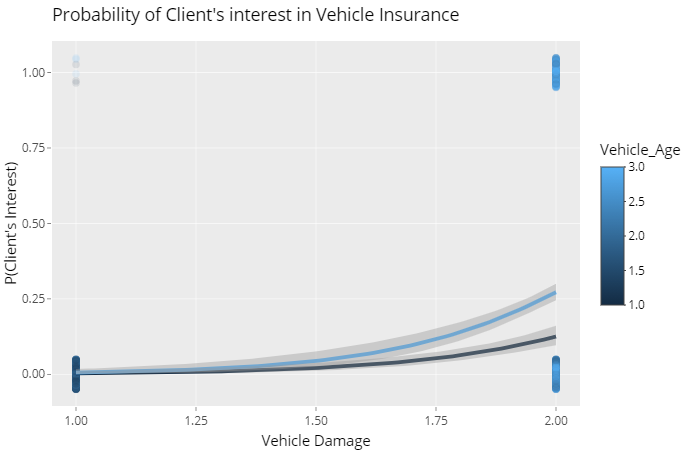

### (2) Visualization of predicted probabilities

In [12]:
# Obtain sample dataset from test_df
test_df_vis <- test_df[1:3000, ]

# Print the head and structure of the sample dataset
head(test_df_vis)
str(test_df_vis)

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response_Pred,Response_Real
381110,Male,25,1,11,1,< 1 Year,No,35786,152,53,0,0
381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111,0,0.372
381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199,0,0.275
381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187,0,0.004
381114,Male,27,1,28,1,< 1 Year,No,59097,152,297,0,0
381115,Male,22,1,30,1,< 1 Year,No,40207,152,266,0,0.001


Classes 'data.table' and 'data.frame':	3000 obs. of  13 variables:
 $ id                  : int  381110 381111 381112 381113 381114 381115 381116 381117 381118 381119 ...
 $ Gender              : chr  "Male" "Male" "Male" "Male" ...
 $ Age                 : int  25 40 47 24 27 22 51 25 42 37 ...
 $ Driving_License     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Region_Code         : num  11 28 28 27 28 30 37 41 41 12 ...
 $ Previously_Insured  : int  1 0 0 1 1 1 1 1 0 1 ...
 $ Vehicle_Age         : chr  "< 1 Year" "1-2 Year" "1-2 Year" "< 1 Year" ...
 $ Vehicle_Damage      : chr  "No" "Yes" "Yes" "Yes" ...
 $ Annual_Premium      : num  35786 33762 40050 37356 59097 ...
 $ Policy_Sales_Channel: num  152 7 124 152 152 152 26 152 26 124 ...
 $ Vintage             : int  53 111 199 187 297 266 107 232 277 133 ...
 $ Response_Pred       : chr  "0" "0" "0" "0" ...
 $ Response_Real       : chr  "0" "0.372" "0.275" "0.004" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [13]:
# Convert a response variable to a numeric variable for visualization
test_df_vis$Response_Real <- as.numeric(test_df_vis$Response_Real)

# Plot the predicted probabilites of clients' interest with conditions
p1 <- ggplot(test_df_vis, aes(x=Age, y=Response_Real)) +
        geom_point(aes(color=Vehicle_Damage), alpha=0.3) +
        stat_smooth() +
        labs(x="Age", y="P(Predicted Response)", title="Predicted Probability of Client's Interest in Vehicle Insurance")

fig1 <- ggplotly(p1)
# fig1

# Save a plot as a html file
# htmlwidgets::saveWidget(fig1, "C:/Users/james/Desktop/Coding/Projects/fig1.html")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


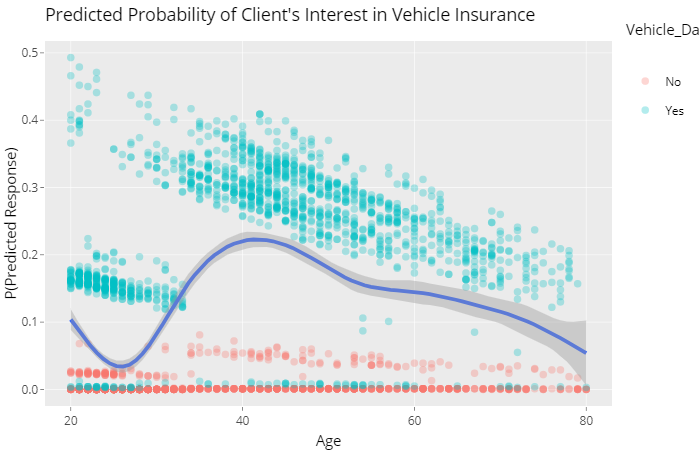

In [14]:
# Convert a response variable to a numeric variable
test_df_vis$Response_Real <- as.numeric(test_df_vis$Response_Real)
test_df_vis$Response_Real <- round(test_df_vis$Response_Real, digits = 2)

# Plot the predicted probabilites of client's with given predictors
p2 <- ggplot(test_df_vis, aes(x=Annual_Premium, y=Response_Real)) +
        geom_point(aes(color=Vehicle_Age), alpha=0.3) +
        stat_smooth() +
        labs(x="Annual Premium ($)", y="P(Predicted Response)", 
             title="Predicted Probability of Client's Interest in Vehicle Insurance")

fig2 <- ggplotly(p2)
# fig2

# Save a plot as a html file
# htmlwidgets::saveWidget(fig2, "C:/Users/james/Desktop/Coding/Projects/fig2.html")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


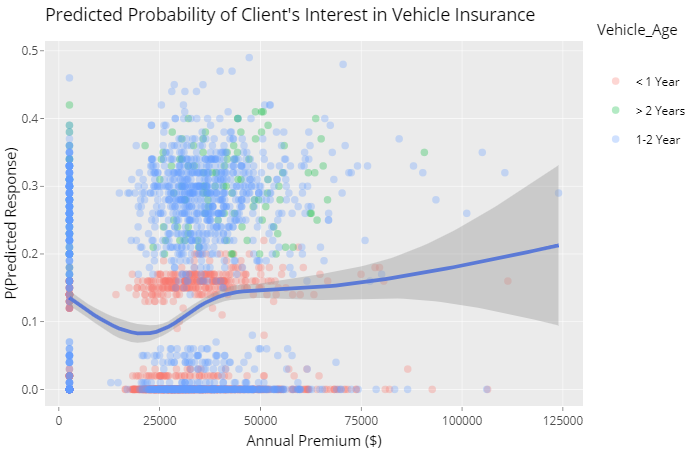

In [15]:
# Convert a response variable to a numeric variable
test_df_vis$Response_Real <- as.numeric(test_df_vis$Response_Real)
test_df_vis$Response_Real <- round(test_df_vis$Response_Real, digits = 2)

# Plot the predicted probabilites of client's with given predictors
p3 <- ggplot(test_df_vis, aes(x=Policy_Sales_Channel, y=Response_Real)) +
        geom_point(aes(color=Previously_Insured), alpha=0.3) +
        stat_smooth() +
        labs(x="Policy Sales Channel", y="P(Predicted Response)", 
             title="Predicted Probability of Client's Interest in Vehicle Insurance")

fig3 <- ggplotly(p3)
# fig3

# Save a plot as a html file
# htmlwidgets::saveWidget(fig3, "C:/Users/james/Desktop/Coding/Projects/fig3.html")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


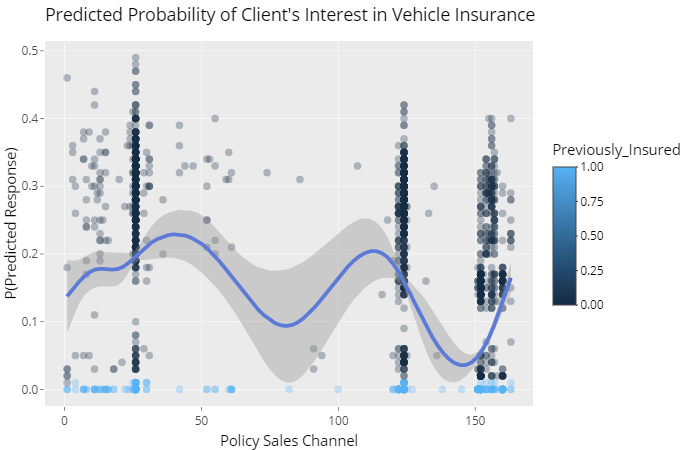